In [31]:
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [58]:
def exp_fit(x, a, b):
    return a * np.power(x, b)

def log_fit(x, a, b):
    return a * x*np.log(x) + b

<ipython-input-58-b3f22c8041d9>:2: RuntimeWarning: overflow encountered in power
  return a * np.power(x, b)


[0.18115516 1.93037561]


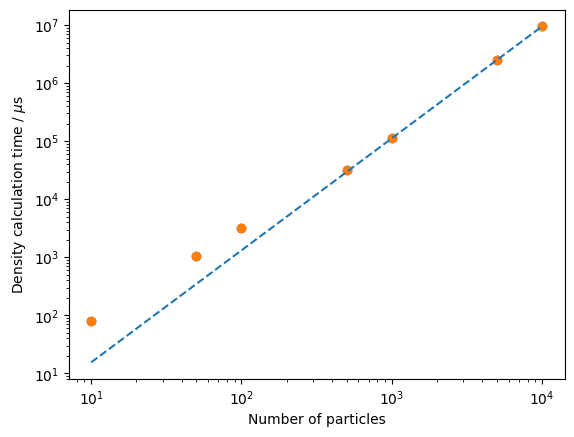

In [59]:
# Read in text file and calculate average time
x = []
y = []
profile_files = glob.glob("profiling/profiling_*.txt")
for p in profile_files:
    # Grab particle count from filename
    n_part = int(re.findall('\d+(?=part.txt)', p)[0])
    data = np.loadtxt(p)
    avg = np.mean(data)
    x.append(n_part)
    y.append(avg)


plt.scatter(x, y, label="Data")
popt, pcov = scipy.optimize.curve_fit(exp_fit, x, y)

x = sorted(x)
print(popt)
plt.plot(x, exp_fit(x, popt[0], popt[1]), linestyle='dashed', label="Fit")


ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Number of particles")
ax.set_ylabel("Density calculation time / $\mu$s")
plt.show()